In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
plt.rcParams['image.cmap'] = 'gray'

if 'google.colab' in str (get_ipython()):
  print('Downloading code to colab Environment')
  !wget https://www.dropbox.com/sh/f8ae3j0nbrflife/AAAy-WwcREtWOGgoEbFLDPANa?dl=1 -O module-code.zip -q --show-progress
  !unzip -qq module-code.zip
else:
  pass
  

module-code.zip     100%[===================>]  21.83M  21.2MB/s    in 1.0s    
mapname:  conversion of  failed


Image shape is  (200, 499)


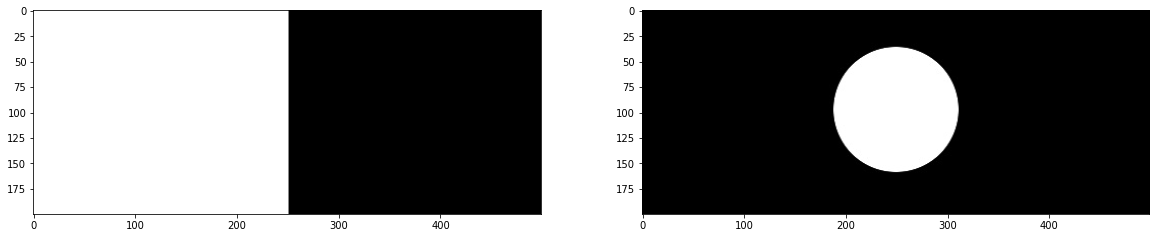

In [2]:
# read the image
img_rec = cv2.imread('/content/rectangle.jpg', cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread('/content/circle.jpg', cv2.IMREAD_GRAYSCALE)


# display the image
plt.figure(figsize=[20, 5])
plt.subplot(121); plt.imshow(img_rec);
plt.subplot(122); plt.imshow(img_cir)
print('Image shape is ', img_rec.shape)

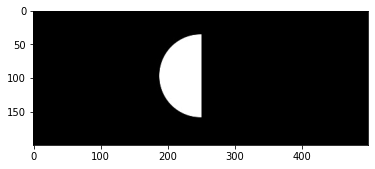

In [3]:
# bitwise and operator 
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result);

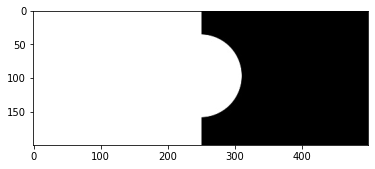

In [4]:
# bitwise or operator 
result = cv2.bitwise_or(img_rec, img_cir, mask= None)
plt.imshow(result);

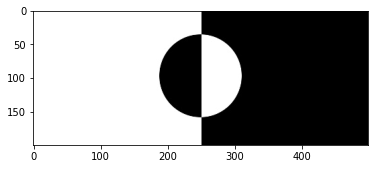

In [5]:
# bitwise xor operator 
result = cv2.bitwise_xor(img_rec, img_cir, mask= None)
plt.imshow(result);

(1000, 1000, 3)


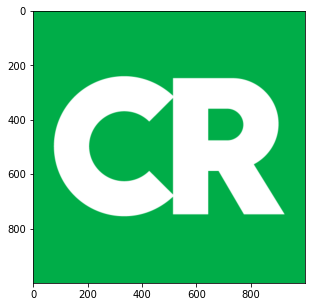

In [6]:
# read image 
img_logo = cv2.imread('/content/CR_Logo.png', cv2.IMREAD_COLOR)

# print the image shape
print(img_logo.shape)
logo_height = img_logo.shape[0]
logo_width = img_logo.shape[1]

# display the images
plt.figure(figsize=[5, 5])
plt.imshow(img_logo[:, :, ::-1]);



Image shape is  (900, 900, 3)


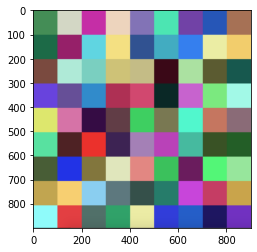

In [7]:
# read the background image 
img_background = cv2.imread('checkerboard_color.png', cv2.IMREAD_COLOR)

# print the image shape 
print ('Image shape is ', img_background.shape)
plt.imshow(img_background);

image shape is  (1000, 1000, 3)


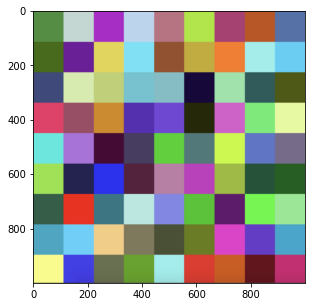

In [8]:
# set the dimension of the background image to be the same as the logo 
dim = (logo_width, logo_height)

# resize the background image to the same as logo image 
img_background = cv2.resize (img_background, dim, interpolation = cv2.INTER_AREA)

print ('image shape is ', img_background.shape)

# display the image 
plt.figure (figsize = [5, 5])
plt.imshow(img_background[:, :, ::-1]);

(1000, 1000)


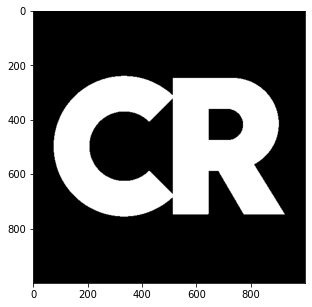

In [9]:
# convert the image to grayscale 
img_logo_gray = cv2.cvtColor(img_logo, cv2.COLOR_BGR2GRAY)

# apply global thresholding to create a binary mask of logo
retval, img_logo_mask = cv2.threshold(img_logo_gray, 127, 255, cv2.THRESH_BINARY)

# print the image shape
print(img_logo_mask.shape);

# display the image.
plt.figure(figsize = [5, 5])
plt.imshow(img_logo_mask);

(1000, 1000, 3)


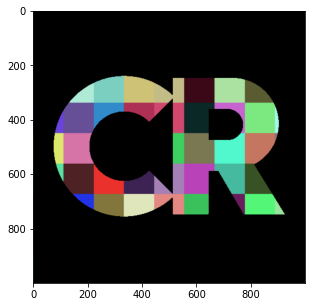

In [10]:
# apply the mask background image 
img_background = cv2.bitwise_and(img_background, img_background, mask= img_logo_mask)

# print the image shape
print(img_background.shape);

# display the image 
plt.figure(figsize=[5, 5])
plt.imshow(img_background);


(1000, 1000)


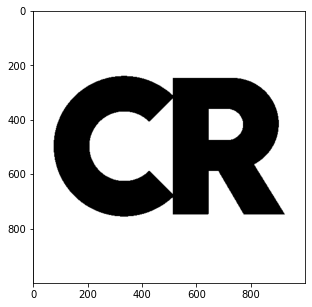

In [11]:
# create and inverse mask
img_logo_mask_inv = cv2.bitwise_not (img_logo_mask)

# print the image shape
print(img_logo_mask_inv.shape)

# display the image.
plt.figure(figsize=[5, 5])
plt.imshow(img_logo_mask_inv);

(1000, 1000, 3)


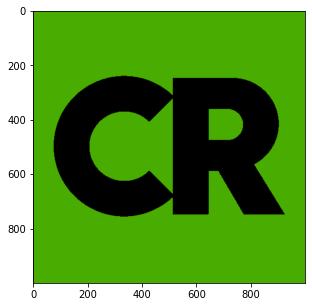

In [12]:
img_foreground = cv2.bitwise_and(img_logo, img_logo, mask = img_logo_mask_inv)

# print the image shape
print(img_foreground.shape)

# display the image 
plt.figure(figsize=[5, 5])
plt.imshow(img_foreground);

True

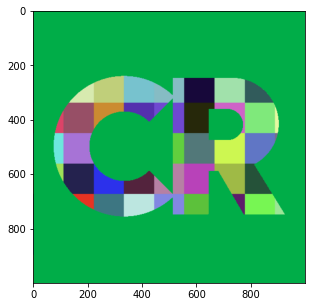

In [13]:
# add the two previous to obtain the final result.
result = cv2.add(img_background, img_foreground)

# display the image and save the result to the file system 
plt.figure(figsize = [5, 5])
plt.imshow(result[:, :, ::-1])

cv2.imwrite('logo_final_1.png', result)

yellow square: (600, 600, 3)
gray circle:  (1000, 1000, 3)


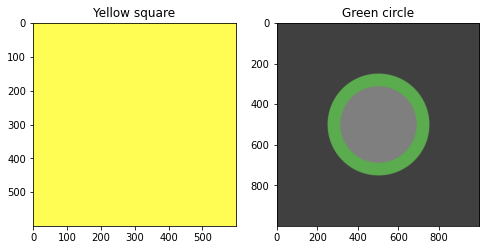

In [14]:
# read the image of a yellow square 
img_yellow_square = cv2.imread('/content/yellow_square.png', cv2.IMREAD_COLOR)


# read the image of a green/gray circle inside square.
img_green_circle = cv2.imread('/content/green_circle.png', cv2.IMREAD_COLOR)

print('yellow square:', img_yellow_square.shape)
print('gray circle: ', img_green_circle.shape)

# display both input images using matplotlib imshow()
plt.figure(figsize=(8, 8))
plt.subplot(121); plt.imshow(img_yellow_square[:, :, ::-1]); plt.title('Yellow square')
plt.subplot(122); plt.imshow(img_green_circle);  plt.title('Green circle');

In [15]:
# resize the background (yellow) image to the same size as the grayscale image
dim = (img_green_circle.shape[1], img_green_circle.shape[0])

# resie the yellow square
img_yellow_square = cv2.resize(img_yellow_square, dim, interpolation=cv2.INTER_AREA)

# print the image size to confire the width and height match 
print ('yellow square - ', img_yellow_square.shape)
print('gray circle -  ', img_green_circle.shape)

yellow square -  (1000, 1000, 3)
gray circle -   (1000, 1000, 3)


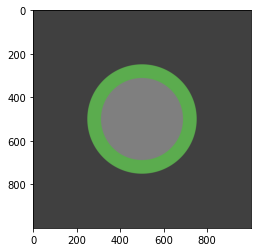

In [16]:
plt.imshow(img_green_circle);

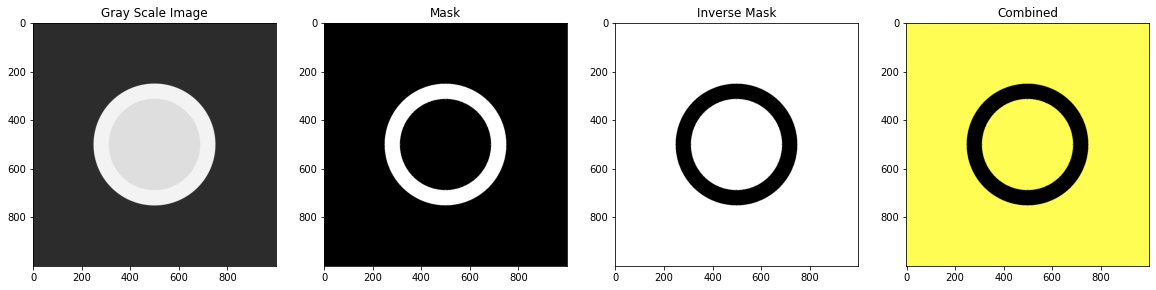

In [23]:
# Convert the green circle image to grayscale using cvtColor()
# YOUR CODE HERE
img_gray_circle = cv2.cvtColor(img_green_circle, cv2.COLOR_BGR2GRAY)
# plt.imshow(img_gray_circle)

# Use the threshold() function to create a binary mask (white RING inside a black square).
# Hint: You will need to CARFULLY choose a threshold value that isolates the light gray ring.
# YOUR CODE HERE
retval, img_ring_mask = cv2.threshold(img_gray_circle, 127, 255, cv2.THRESH_BINARY)
# plt.imshow(img_ring_mask)

# Use the bitwise_not() function to create an inverse mask.
# YOUR CODE HERE
img_ring_mask_inv = cv2.bitwise_not(img_ring_mask,cv2.COLOR_BGR2GRAY)
# plt.imshow(img_ring_mask_inv)

# Use bitwise_and() to create the final combined image (black ring on a yellow square)
# YOUR CODE HERE
img_combined = cv2.bitwise_and(img_yellow_square, img_yellow_square, mask= img_ring_mask_inv)
# plt.imshow(img_combined)

# Display the images.
# UNCOMMENT THE LINES BELOW
plt.figure(figsize = [20,10])
plt.subplot(141); plt.imshow(img_gray_circle);          plt.title('Gray Scale Image')
plt.subplot(142); plt.imshow(img_ring_mask);            plt.title('Mask')
plt.subplot(143); plt.imshow(img_ring_mask_inv);        plt.title('Inverse Mask')
plt.subplot(144); plt.imshow(img_combined[:, :, ::-1]); plt.title('Combined');